# Módulo 5 Tarefa 1
## Base de nascidos vivos do DataSUS
O DataSUS disponibiliza diversos arquivos de dados com relação a seus segurados, conforme a [lei da transparência de informações públicas](https://www.sisgov.com/transparencia-acesso-informacao/#:~:text=A%20Lei%20da%20Transpar%C3%AAncia%20(LC,em%20um%20site%20na%20internet.). 

Essas informações podem ser obtidas pela internet [aqui](http://www2.datasus.gov.br/DATASUS/index.php?area=0901&item=1). Como o processo de obtenção desses arquivos foge um pouco do nosso escopo, deixamos o arquivo SINASC_RO_2019.csv` já como vai ser encontrado no DataSUS. O dicionário de dados está no arquivo `estrutura_sinasc_para_CD.pdf` (o nome do arquivo tal qual no portal do DataSUS).

### Nosso objetivo
Queremos deixar uma base organizada para podermos estudar a relação entre partos com risco para o bebê e algumas condições como tempo de parto, consultas de pré-natal etc.

#### Preparação da base
1. Carregue a base 'SINASC_RO_2019.csv'. Conte o número de registros e o número de registros não duplicados da base. Dica: você aprendeu um método que remove duplicados, encadeie este método com um outro método que conta o número de linhas. **Há linhas duplicadas?**  

2. Conte o número de valores *missing* por variável.  

3. Ok, no item anterior você deve ter achado pouco prático ler a informação de tantas variáveis, muitas delas nem devem ser interesantes. Então crie uma seleção dessa base somente com as colunas que interessam. São elas:
` 
['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 
    'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5'] 
`
Refaça a contagem de valores *missings*.  

4. Apgar é uma *nota* que o pediatra dá ao bebê quando nasce de acordo com algumas características associadas principalmente à respiração. Apgar 1 e Apgar 5 são as notas 1 e 5 minutos do nascimento. Apgar5 será a nossa variável de interesse principal. Então remova todos os registros com Apgar5 não preenchido. Para esta seleção, conte novamente o número de linhas e o número de *missings*.  

5. observe que as variáveis `['ESTCIVMAE', 'CONSULTAS']` possuem o código `9`, que significa *ignorado*. Vamos assumir que o não preenchido é o mesmo que o código `9`.<br>
6. Substitua os valores faltantes da quantitativa (`QTDFILVIVO`) por zero.  
7. Das restantes, decida que valore te parece mais adequado (um 'não preenchido' ou um valor 'mais provável' como no item anterior) e preencha. Justifique. Lembre-se de que tratamento de dados é trabalho do cientista, e que estamos tomando decisões a todo o momento - não há necessariamente certo e errado aqui.  
8. O Apgar possui uma classificação indicando se o bebê passou por asfixia:
- Entre 8 e 10 está em uma faixa 'normal'. 
- Entre 6 e 7, significa que o recém-nascido passou por 'asfixia leve'. 
- Entre 4 e 5 significa 'asfixia moderada'.
- Entre 0 e 3 significa 'asfixia severa'.  

Crie uma categorização dessa variável com essa codificação e calcule as frequências dessa categorização.  
<br>
9. Renomeie as variáveis para que fiquem no *snake case*, ou seja, em letras minúsculas, com um *underscore* entre as palávras. Dica: repare que se você não quiser criar um *dataframe* novo, você vai precisar usar a opção `inplace = True`.

# EXERCICIOS

**1.** Carregue a base 'SINASC_RO_2019.csv'. Conte o número de registros e o número de registros não duplicados da base. Dica: você aprendeu um método que remove duplicados, encadeie este método com um outro método que conta o número de linhas. Há linhas duplicadas?

In [157]:
import pandas as pd
import requests

sinasc = pd.read_csv('SINASC_RO_2019.csv')
print(sinasc.shape)

(27028, 69)


In [158]:
# Não há duplicados
sinasc.drop_duplicates().shape

(27028, 69)

**2.** Conte o número de valores missing por variável.

In [159]:
sinasc.isna().sum()

ORIGEM          0
CODESTAB      115
CODMUNNASC      0
LOCNASC         0
IDADEMAE        0
             ... 
munResUf        0
munResLat       1
munResLon       1
munResAlt       1
munResArea      1
Length: 69, dtype: int64

**3.** Ok, no item anterior você deve ter achado pouco prático ler a informação de tantas variáveis, muitas delas nem devem ser interesantes. Então crie uma seleção dessa base somente com as colunas que interessam. São elas:
` 
['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 
    'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5'] 
`
Refaça a contagem de valores *missings*.  

In [160]:
# aqui crio uma lista com as colunas desejadas para checagem de missing values
valores_checagem = ['LOCNASC', 'IDADEMAE', 'ESTCIVMAE', 'ESCMAE', 'QTDFILVIVO', 'GESTACAO', 'GRAVIDEZ', 'CONSULTAS', 'APGAR5']

# agora, filtro os missing values baseando-me na lista acima
sinasc[valores_checagem].isna().sum()

LOCNASC          0
IDADEMAE         0
ESTCIVMAE      317
ESCMAE         312
QTDFILVIVO    1573
GESTACAO      1232
GRAVIDEZ        79
CONSULTAS        0
APGAR5         103
dtype: int64

**4.** Apgar é uma nota que o pediatra dá ao bebê quando nasce de acordo com algumas características associadas principalmente à respiração. Apgar 1 e Apgar 5 são as notas 1 e 5 minutos do nascimento. Apgar5 será a nossa variável de interesse principal. Então remova todos os registros com Apgar5 não preenchido. Para esta seleção, conte novamente o número de linhas e o número de missings. 

In [161]:
# primeiramente, removo todos os missing values da coluna Apgar5
sinasc = sinasc.dropna(subset=['APGAR5'])

# aqui conto o novo número de linhas
print("Número de linhas:", sinasc.shape[0])

# finalmente, conto o número de missing values
print("Total de valores ausentes após a filtragem:", sinasc.isna().sum().sum())

Número de linhas: 26925
Total de valores ausentes após a filtragem: 120778


**5.** Observe que as variáveis ['ESTCIVMAE', 'CONSULTAS'] possuem o código 9, que significa ignorado. Vamos assumir que o não preenchido é o mesmo que o código 9.

In [162]:
# primeiro, checo quantos missing values temos em cada coluna desejada
print(sinasc['ESCMAE'].isna().sum())
print(sinasc['LOCNASC'].isna().sum())
print(sinasc['ESTCIVMAE'].isna().sum())
print(sinasc['CONSULTAS'].isna().sum())
print(sinasc['GESTACAO'].isna().sum())
print(sinasc['GRAVIDEZ'].isna().sum())
print(sinasc['PARTO'].isna().sum())
print(sinasc['IDANOMAL'].isna().sum())

310
0
315
0
1216
76
49
580


In [163]:
# agora, trato todas as colunas que possuem o código 9
sinasc['ESCMAE'] = sinasc['ESCMAE'].fillna('ignorado')
sinasc['LOCNASC'] = sinasc['LOCNASC'].fillna('ignorado')
sinasc['ESTCIVMAE'] = sinasc['ESTCIVMAE'].fillna('ignorado')
sinasc['CONSULTAS'] = sinasc['CONSULTAS'].fillna('ignorado')
sinasc['GESTACAO'] = sinasc['GESTACAO'].fillna('ignorado')
sinasc['GRAVIDEZ'] = sinasc['GRAVIDEZ'].fillna('ignorado')
sinasc['PARTO'] = sinasc['PARTO'].fillna('ignorado')
sinasc['IDANOMAL'] = sinasc['IDANOMAL'].fillna('ignorado')

In [164]:
# por ultimo, imprimo novamente as colunas acima para certificar de que os missing values foram tratados
print(sinasc['ESCMAE'].isna().sum())
print(sinasc['LOCNASC'].isna().sum())
print(sinasc['ESTCIVMAE'].isna().sum())
print(sinasc['CONSULTAS'].isna().sum())
print(sinasc['GESTACAO'].isna().sum())
print(sinasc['GRAVIDEZ'].isna().sum())
print(sinasc['PARTO'].isna().sum())
print(sinasc['IDANOMAL'].isna().sum())

0
0
0
0
0
0
0
0


**6.** Substitua os valores faltantes da quantitativa (QTDFILVIVO) por zero.

In [165]:
# primeiro, checo quantos missing values temos em cada coluna desejada
print(sinasc['QTDFILVIVO'].isna().sum())

1566


In [166]:
# aqui substituo os missing values da coluna 'QTDFILVIVO' por zero, e checo novamente o total de missing values na coluna
sinasc['QTDFILVIVO'] = sinasc['QTDFILVIVO'].fillna(0)
print(sinasc['QTDFILVIVO'].isna().sum())

0


**7.** Das restantes, decida que valore te parece mais adequado (um 'não preenchido' ou um valor 'mais provável' como no item anterior) e preencha. Justifique. Lembre-se de que tratamento de dados é trabalho do cientista, e que estamos tomando decisões a todo o momento - não há necessariamente certo e errado aqui.

In [167]:
# devido ao fato de o Dataframe possuir algumas colunas que tem o 0 intencionalmente adicionado,
# acredito que adicionar 'não preenchido' para os missing values seja a melhor opção

# novamente, faco a checagem de quantos missing values ainda temos
print(sinasc.isna().sum().sum())

116666


In [168]:
# agora sim substituo todos os missing values por 'não preenchido' e checo novamente o total de missing values no dataframe
sinasc = sinasc.fillna('não preenchido')
print(sinasc.isna().sum().sum())

0


**8.** O Apgar possui uma classificação indicando se o bebê passou por asfixia:
- Entre 8 e 10 está em uma faixa 'normal'. 
- Entre 6 e 7, significa que o recém-nascido passou por 'asfixia leve'. 
- Entre 4 e 5 significa 'asfixia moderada'.
- Entre 0 e 3 significa 'asfixia severa'.  

Crie uma categorização dessa variável com essa codificação e calcule as frequências dessa categorização.  

In [169]:
# aqui defino faixas e rótulos que serão usados para a categorização.
bins = [-1, 3, 5, 7, 10]
labels = ['asfixia_severa', 'asfixia_moderada', 'asfixia_leve', 'normal']

# agora crio a coluna categórica e logo checo se ela foi criada apropriadamente
sinasc['APGAR_cat'] = pd.cut(sinasc['APGAR5'], bins=bins, labels=labels)
sinasc['APGAR_cat']

0        normal
1        normal
2        normal
3        normal
4        normal
          ...  
27023    normal
27024    normal
27025    normal
27026    normal
27027    normal
Name: APGAR_cat, Length: 26925, dtype: category
Categories (4, object): ['asfixia_severa' < 'asfixia_moderada' < 'asfixia_leve' < 'normal']

In [170]:
# pra finalizar, mostrando a frequência de cada categoria
sinasc['APGAR_cat'].value_counts(ascending=False)

APGAR_cat
normal              26463
asfixia_leve          320
asfixia_severa         74
asfixia_moderada       68
Name: count, dtype: int64

**9.** Renomeie as variáveis para que fiquem no *snake case*, ou seja, em letras minúsculas, com um *underscore* entre as palávras. Dica: repare que se você não quiser criar um *dataframe* novo, você vai precisar usar a opção `inplace = True`. 

In [171]:
# Import o módulo re
import re

def snake_case(col):
    # Removendo espaços no início/fim, substitui espaços e traços por underscore
    col = col.strip()
    col = re.sub(r'[\s\-]+', '_', col)

    # Inserindo underscore entre palavras em maiúsculas e minúsculas
    col = re.sub(r'([a-z])([A-Z])', r'\1_\2', col)

    # Convertendo tudo para minúsculo
    col = col.lower()
    return col

# Aplicando a função a todos os nomes de coluna
sinasc.columns = [snake_case(col) for col in sinasc.columns]

In [172]:
# Checo se a função acima foi criada apropriadamente
sinasc.head(2)

,origem,codestab,codmunnasc,locnasc,idademae,estcivmae,escmae,codocupmae,qtdfilvivo,qtdfilmort,...,contador,mun_res_status,mun_res_tipo,mun_res_nome,mun_res_uf,mun_res_lat,mun_res_lon,mun_res_alt,mun_res_area,apgar_cat
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,não preenchido,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal


# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

Primeiro, importo todas as bibliotecas que serão necessarias nessa atividade.

A base SINASC_RO_2019 já foi carregada e teve seus dados tratados acima. Abaixo, darei foco apenas a montagem dos graficos.

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
# %matplotlib notebook

In [174]:
sinasc.shape

(26925, 70)

####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

Os blocos código abaixo fazem a limpeza e visualização de variáveis categóricas do dataframe 'sinasc'. Primeiro, substituí os códigos numéricos da coluna **estcivmae** por seus significados reais (como "Solteira", "Casada" etc.) usando um dicionário de mapeamento. Em seguida, assim como pede o enunciado, criei gráficos de barras para cada variável. Os valores da variáveis **apgar1**, no eixo X, não estavam em order crescente, então tratei, garantindo que os valores no eixo X estivessem ordenados corretamente, mesmo quando misturavam números e textos. Também removi rótulos desnecessários e supri avisos para deixar a visualização mais clara e limpa.

In [175]:
estado_civil_dict = {
    1: 'Solteira',
    2: 'Casada',
    3: 'Viúva',
    4: 'Separada/Divorciada',
    5: 'União estável',
    9: 'Ignorado'
}

# Aplico o mapeamento na coluna 'estcivmae'
sinasc['estcivmae'] = sinasc['estcivmae'].map(estado_civil_dict)

In [176]:
sinasc['estcivmae'].value_counts()

estcivmae
Casada                 9906
Solteira               8907
União estável          7145
Separada/Divorciada     451
Ignorado                144
Viúva                    57
Name: count, dtype: int64

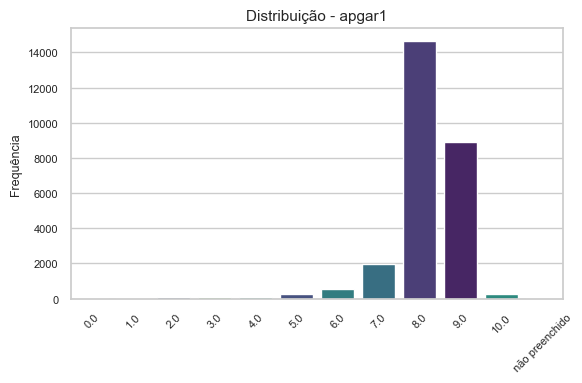

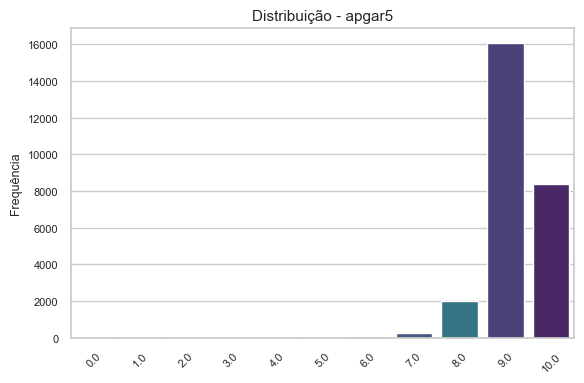

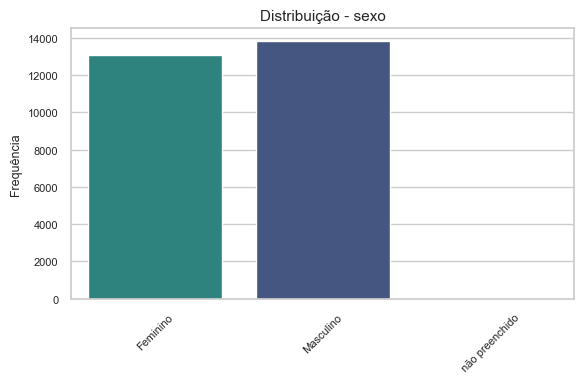

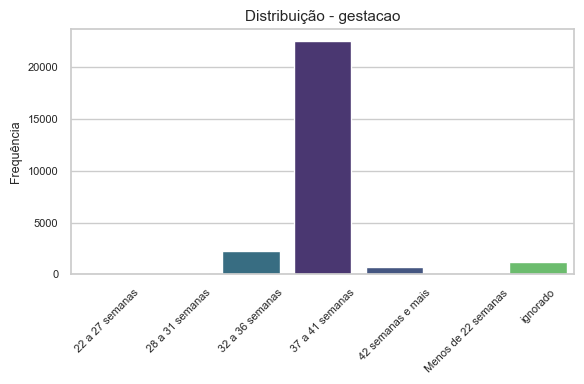

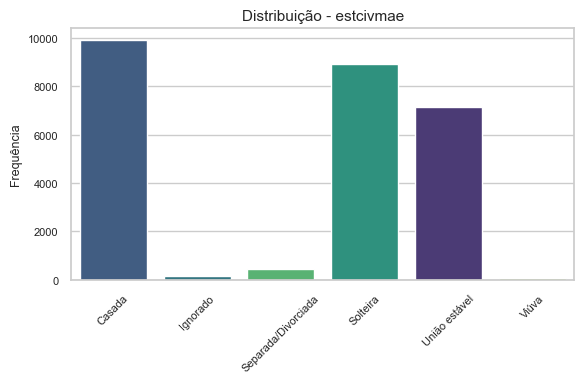

In [193]:
# Lista de variáveis de interesse
variaveis = ['apgar1', 'apgar5', 'sexo', 'gestacao', 'estcivmae']

# Função para ordenar valores mistos (números e textos)
def ordenar_misto(coluna):
    unicos = coluna.dropna().unique()
    valores_numericos = []
    valores_textuais = []
    
    for val in unicos:
        try:
            float(val)
            valores_numericos.append(val)
        except:
            valores_textuais.append(val)
    
    valores_numericos = sorted(valores_numericos, key=lambda x: float(x))
    valores_textuais = sorted(valores_textuais)
    
    return valores_numericos + valores_textuais

# Loop para gerar gráficos
for var in variaveis:
    plt.figure(figsize=(6, 4))
    
    # Converte para string (cuidado: isso transforma NaN em 'nan')
    sinasc[var] = sinasc[var].astype(str)
    
    # Corrige o problema: transforma string 'nan' de volta em np.nan
    sinasc[var] = sinasc[var].replace('nan', np.nan)
    
    # Ordena as categorias válidas
    categorias_ordenadas = ordenar_misto(sinasc[var])
    
    # Suprime o FutureWarning
    with warnings.catch_warnings():
        warnings.filterwarnings('ignore', category=FutureWarning)
        
        # Cria o gráfico sem os NaNs
        sns.countplot(
            data=sinasc[sinasc[var].notna()],
            x=var,
            order=categorias_ordenadas,
            hue=var,
            palette='viridis',
            legend=False
        )

    # Customizações do gráfico
    plt.title(f'Distribuição - {var}', fontsize=11)
    plt.xlabel('')
    plt.ylabel('Frequência', fontsize=9)
    plt.xticks(rotation=45, fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()
    plt.show()

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

Assim como no exercicio 2, substituí os códigos numéricos da coluna **consultas** por seus significados reais (como "Nenhuma", "de 1 a 3" etc.) usando um dicionário de mapeamento.

A ideia desse código é mostrar, de forma visual, como a média do **apgar5** varia conforme o número de consultas pré-natal. Primeiro, eu transformo a coluna **apgar5** em número, caso tenha algum valor estranho. Depois, crio um gráfico de barras que calcula a média automaticamente pra cada categoria de consultas.

In [178]:
sinasc['consultas'].value_counts()

consultas
4    18587
3     5957
2     1359
1      972
9       50
Name: count, dtype: int64

In [179]:
consultas_dict = {
    1: 'Nenhuma',
    2: 'de 1 a 3',
    3: 'de 4 a 6',
    4: '7 e mais',
    9: 'ignorado'
}

consultas_dict

{1: 'Nenhuma', 2: 'de 1 a 3', 3: 'de 4 a 6', 4: '7 e mais', 9: 'ignorado'}

In [180]:
sinasc['consultas'] = sinasc['consultas'].map(consultas_dict)

In [181]:
sinasc['consultas'].value_counts()

consultas
7 e mais    18587
de 4 a 6     5957
de 1 a 3     1359
Nenhuma       972
ignorado       50
Name: count, dtype: int64

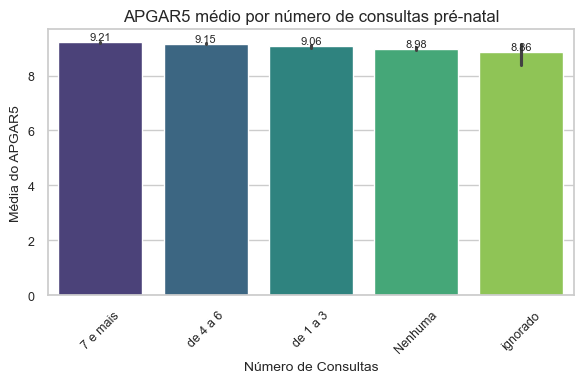

In [182]:
# Garante que apgar5 é numérico
sinasc['apgar5'] = pd.to_numeric(sinasc['apgar5'], errors='coerce')

plt.figure(figsize=(6, 4))

# Crio o gráfico
ax = sns.barplot(data=sinasc, x='consultas', y='apgar5', estimator='mean',
                 hue='consultas', palette='viridis', legend=False)

plt.title('APGAR5 médio por número de consultas pré-natal', fontsize=12)
plt.xlabel('Número de Consultas', fontsize=10)
plt.ylabel('Média do APGAR5', fontsize=10)
plt.xticks(rotation=45, fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()

# Loop para colocar os valores médios em cima das barras
for p in ax.patches:
    altura = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = altura
    ax.text(x, y, f'{altura:.2f}', ha='center', va='bottom', fontsize=8)

plt.show()

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

O código abaixo cria um painel com 4 gráficos de barras, cada um mostrando a frequência de uma variável categórica do DataFrame **sinasc** (sexo, gestacao, estcivmae e consultas). Antes de plotar, ele corrige um problema comum: se a coluna tiver o texto 'nan' (resultado de conversões anteriores), ele substitui por um NaN real para que esses valores não apareçam nos gráficos. Em seguida, ele usa countplot do Seaborn para gerar os gráficos sem incluir os valores ausentes, aplicando uma paleta de cores e ajustes no tamanho do texto e rotação para melhor visualização. O painel final ajuda a visualizar rapidamente a distribuição dessas variáveis no conjunto de dados.

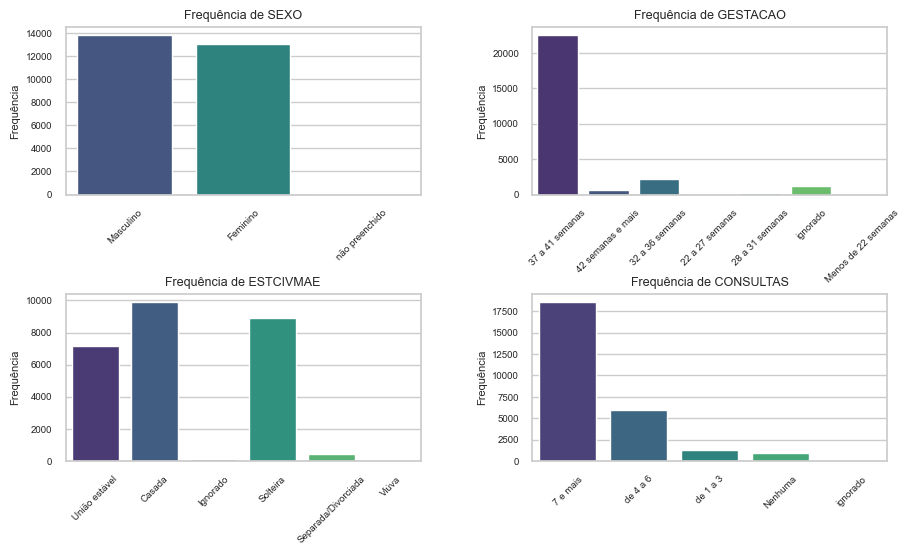

In [192]:
# Lista das variáveis a serem plotadas
colunas = ['sexo', 'gestacao', 'estcivmae', 'consultas']

# Cria painel 2x2
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
plt.tight_layout(pad=4)

for ax, var in zip(axs.flat, colunas):
    # Corrige strings 'nan' (caso existam) e converte de volta para np.nan
    sinasc[var] = sinasc[var].replace('nan', np.nan)
    
    # Cria gráfico sem incluir os NaNs
    sns.countplot(data=sinasc[sinasc[var].notna()], x=var, hue=var, palette='viridis', legend=False, ax=ax)
    
    # Customização do gráfico
    ax.set_title(f'Frequência de {var.upper()}', fontsize=9)
    ax.set_xlabel('')
    ax.set_ylabel('Frequência', fontsize=8)
    ax.tick_params(axis='x', rotation=45, labelsize=7)
    ax.tick_params(axis='y', labelsize=7)

plt.show()